<a href="https://colab.research.google.com/github/priyalagarwal27/Internship-Projects/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.random import set_seed
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving clothes_labels.npy to clothes_labels (1).npy
Saving clothes_photos.npy to clothes_photos (1).npy


In [29]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [30]:
x = np.load('/content/gdrive/MyDrive/Colab Notebooks/DataSet/clothes_photos.npy')
y = np.load('/content/gdrive/MyDrive/Colab Notebooks/DataSet/clothes_labels.npy')

In [31]:
x.shape

(695, 200, 200, 3)

In [32]:
y.astype(int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [33]:
y = np_utils.to_categorical(y - 1, 3)

In [34]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [35]:
y.shape

(695, 3)

In [36]:
imgsize = 200

In [37]:
x=x/255

In [38]:
x

array([[[[1.        , 0.99607843, 0.99215686],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.4509804 , 0.32941177, 0.2509804 ],
         [0.4509804 , 0.32941177, 0.2509804 ],
         [0.84313726, 0.75686276, 0.7058824 ]],

        [[1.        , 0.99607843, 0.99215686],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.38039216, 0.26666668, 0.19607843],
         [0.38039216, 0.26666668, 0.19607843],
         [1.        , 0.95686275, 0.9137255 ]],

        [[1.        , 0.99607843, 0.99215686],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.42745098, 0.3254902 , 0.26666668],
         [0.42745098, 0.3254902 , 0.26666668],
         [1.        , 0.9843137 , 0.94509804]],

        ...,

        [[1.        , 0.99607843, 1.        ],
         [1.        , 0.99607843, 1.        ]

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

augs_gen.fit(x_train)

In [41]:
set_seed(42) #setting the seed
cnn = Sequential()

# The convolutional layers
cnn.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(imgsize,imgsize,3), kernel_regularizer=regularizers.l1(1e-5)))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(Dropout(.20))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(Dropout(.20))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(Dropout(.20))

# The fully connected layers
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(Dropout(.20))
cnn.add(layers.Dense(3, activation='softmax'))

# Compile the model
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Fit the model
model = cnn.fit(x_train,y_train, epochs=10, validation_split=0.2, # taking 20 percent of training set for validation
                  callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience=3))
cnn.save('model_cnn.h5')

Epoch 1/10
14/14 [==============================] - 31s 2s/step - loss: 1.3064 - accuracy: 0.3468 - val_loss: 1.0988 - val_accuracy: 0.3571
Epoch 2/10
14/14 [==============================] - 28s 2s/step - loss: 1.0715 - accuracy: 0.4482 - val_loss: 1.0143 - val_accuracy: 0.5625
Epoch 3/10
14/14 [==============================] - 29s 2s/step - loss: 0.7757 - accuracy: 0.6149 - val_loss: 0.6070 - val_accuracy: 0.7321
Epoch 4/10
14/14 [==============================] - 28s 2s/step - loss: 0.6409 - accuracy: 0.6667 - val_loss: 0.5733 - val_accuracy: 0.7411
Epoch 5/10
14/14 [==============================] - 29s 2s/step - loss: 0.5937 - accuracy: 0.6802 - val_loss: 0.5630 - val_accuracy: 0.6518
Epoch 6/10
14/14 [==============================] - 29s 2s/step - loss: 0.5861 - accuracy: 0.6824 - val_loss: 0.5283 - val_accuracy: 0.8125
Epoch 7/10
14/14 [==============================] - 29s 2s/step - loss: 0.5088 - accuracy: 0.7275 - val_loss: 0.4463 - val_accuracy: 0.8304
Epoch 8/10
14/14 [==

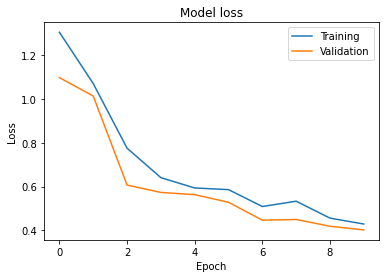

In [42]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [43]:
print("Accuracy : ", cnn.evaluate(x_test, y_test))

5/5 [==============================] - 2s 416ms/step - loss: 0.4826 - accuracy: 0.7482
Accuracy :  [0.48261332511901855, 0.7482014298439026]


In [44]:
# Prediction on the test image
cnn_pred = cnn.predict(x_test, verbose=1)
cnn_pred = np.argmax(cnn_pred, axis=1) # this will pick the value in an array having the maximum score

5/5 [==============================] - 2s 411ms/step


In [45]:
cnn_pred[7]

0

In [46]:
y_test.shape

(139, 3)

In [47]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

2

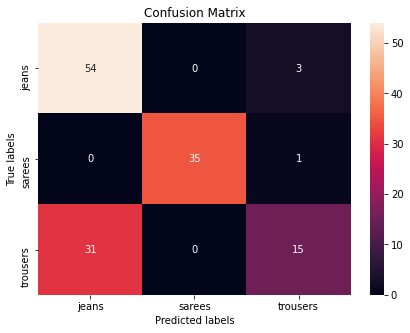

In [48]:
# Confusion matrix for results
cm = confusion_matrix(rounded_labels, cnn_pred)

fig, ax= plt.subplots(figsize=(7,5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); # annot=True to annotate cells. 'fmt' prevents the numbers from going to scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['jeans','sarees','trousers']); ax.yaxis.set_ticklabels(['jeans','sarees','trousers']);

In [49]:
test_labels=rounded_labels.tolist() # converting the test_labels into a list 

# Creating a function which picks random images and identifies the class to which the image belongs
def get_image_and_class(size):
  idx = np.random.randint(len(x_test), size=size) # generating a random image from the test data
  for i in range(len(idx)):
    plt.imshow(x_test[idx,:][i]) 
    plt.show()
    
  # Print the class of the random image picked above
    if test_labels[idx[i]] == 1:
      print('This is a sarees!')
    elif test_labels[idx[i]] == 0:
      print('This is a jeans!')
    elif test_labels[idx[i]] == 2:
      print('This is a trousers!')

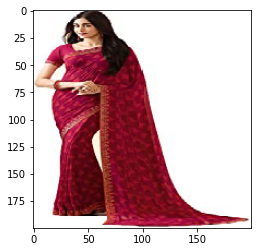

This is a sarees!


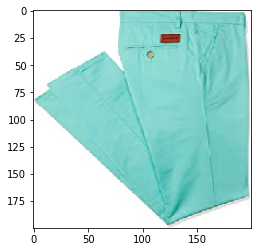

This is a trousers!


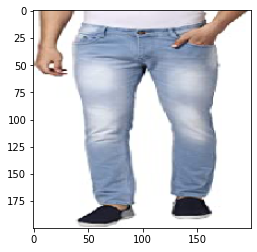

This is a jeans!


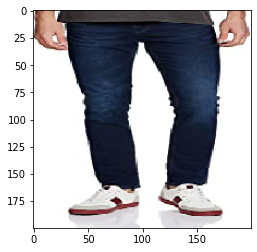

This is a jeans!


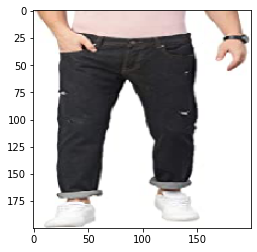

This is a jeans!


In [50]:
get_image_and_class(5)